In [2]:
# Import the data sets using pandas 
import pandas as pd 
df=pd.read_csv("B:\\Feb_28 Data\\Exchange_rate.csv")

In [3]:
# It will show the first five columns 
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


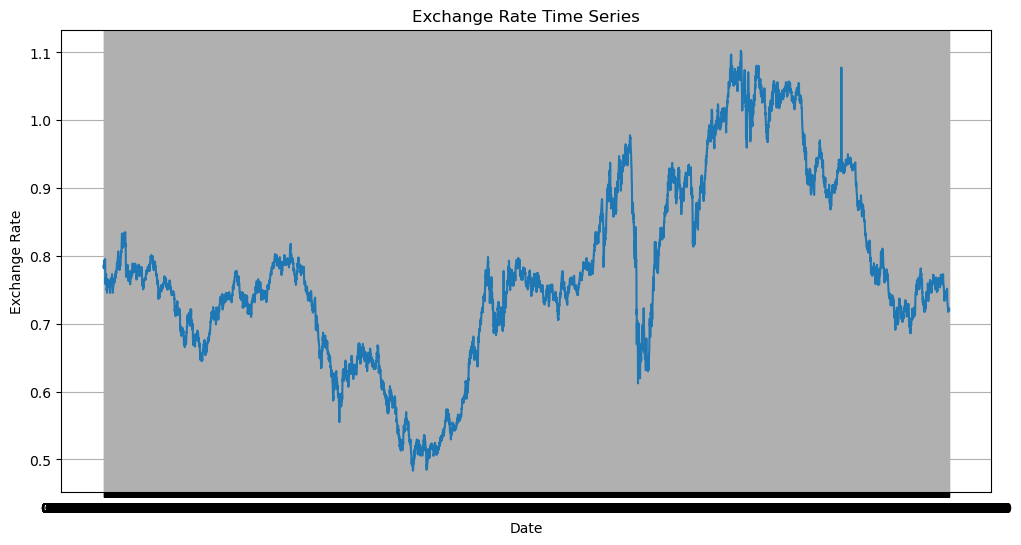

In [16]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

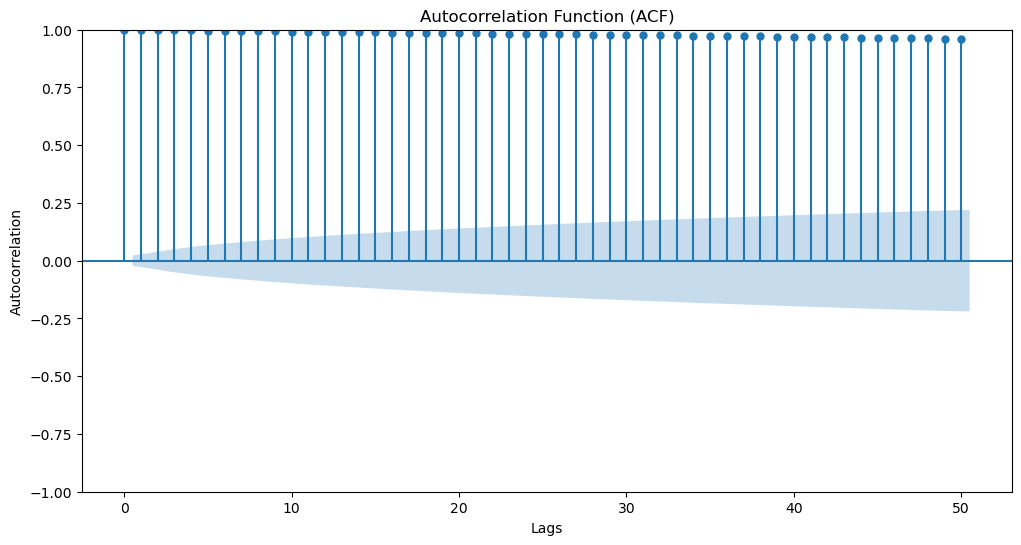

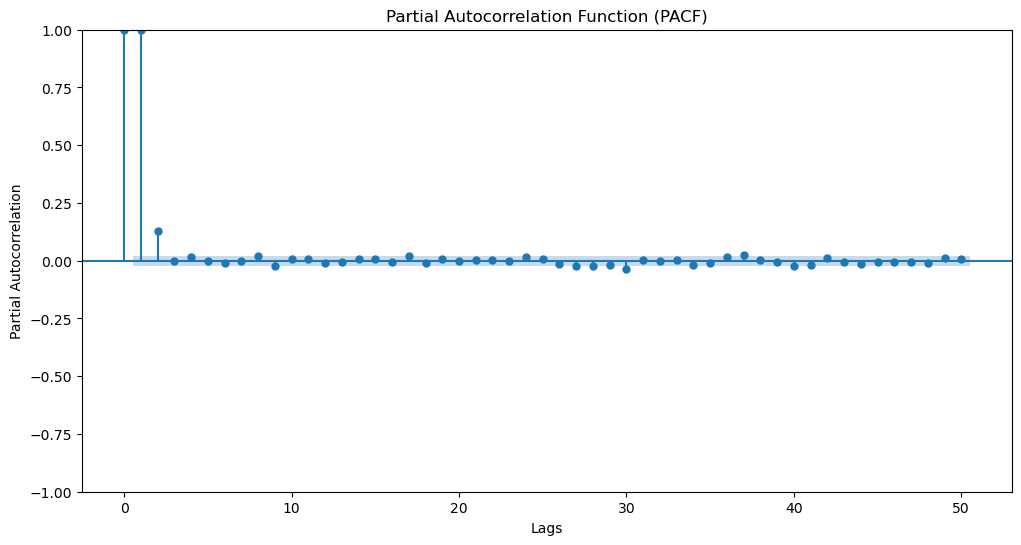

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate ACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Ex_rate'], ax=ax, lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Generate PACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['Ex_rate'], ax=ax, lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA model.
# Based on the ACF and PACF plots, a possible order is (5, 1, 0).
# The ACF plot shows slow decay, suggesting differencing (d=1).
# The PACF plot shows significant spikes up to lag 5, suggesting p=5.
# The ACF plot tails off after the initial lags, suggesting q=0.
model = ARIMA(df['Ex_rate'], order=(5, 1, 0))
model_fit = model.fit()

# Print the model summary
display(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Sun, 05 Oct 2025   AIC                         -56099.370
Time:                        13:08:09   BIC                         -56057.765
Sample:                             0   HQIC                        -56085.091
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.014      -0.030      -0.003
ar.L4          0.0003      0.009      0.028      0.977      -0.018       0.018
ar.L5          0.0112      0.009      1.271      0.204      -0.006       0.029
sigma2      3.594e-05   1.01e-07    354.596      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2864559.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

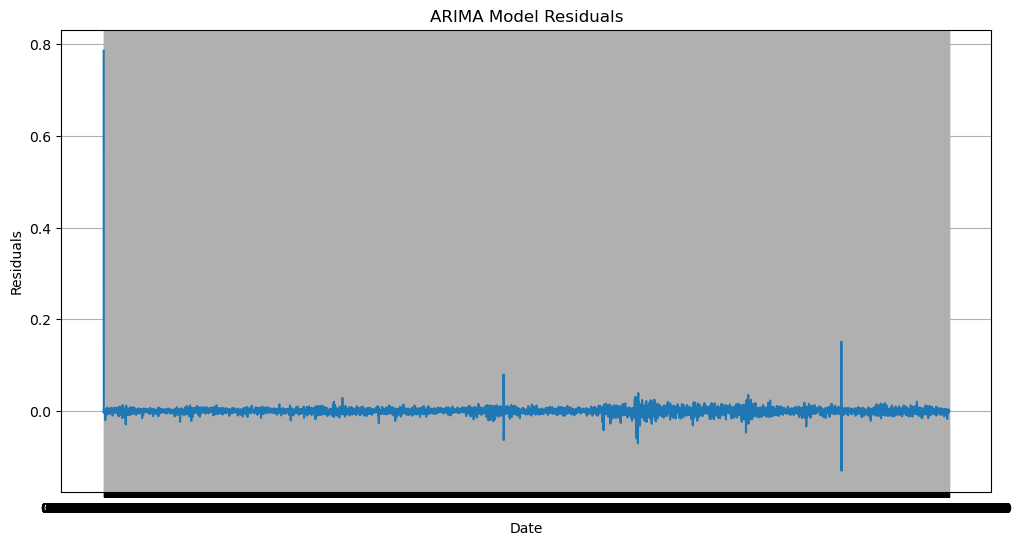

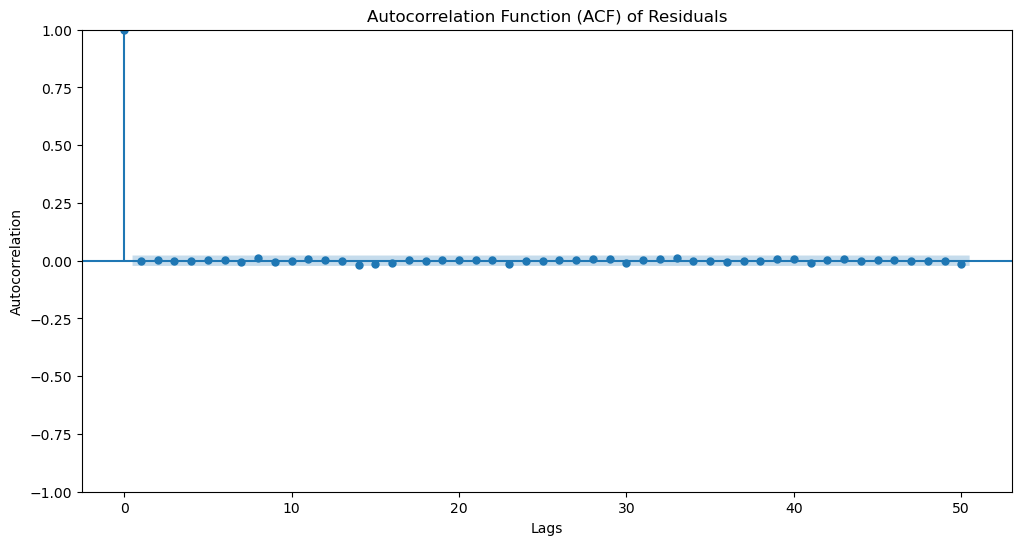

,lb_stat,lb_pvalue
10,1.557986,0.998743
20,6.826560,0.997216


In [19]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(df['date'], residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Generate an ACF plot of the residuals
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, ax=ax, lags=50)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Perform a Ljung-Box test on the residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
display(ljung_box_test)

In [21]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')


# Specify the number of steps to forecast
n_forecast = 365 # Forecasting for one year

# Generate forecasts
forecast_result = model_fit.forecast(steps=n_forecast)

# Create a dataframe for the forecast results
forecast_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast_result})

# Concatenate the original dataframe with the forecast dataframe for plotting
plot_df = pd.concat([df, forecast_df], ignore_index=True)

display(plot_df.tail())

,date,Ex_rate,Rolling_Mean,zscore,forecast
7948,2011-10-06,NaN,NaN,NaN,0.720867
7949,2011-10-07,NaN,NaN,NaN,0.720867
7950,2011-10-08,NaN,NaN,NaN,0.720867
7951,2011-10-09,NaN,NaN,NaN,0.720867
7952,2011-10-10,NaN,NaN,NaN,0.720867


In [22]:
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Specify the number of steps to forecast
n_forecast = 365 # Forecasting for one year

# Generate forecasts
forecast_result = model_fit.forecast(steps=n_forecast)

# Create a dataframe for the forecast results
forecast_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast_result})

# Concatenate the original dataframe with the forecast dataframe for plotting
plot_df = pd.concat([df, forecast_df], ignore_index=True)

display(plot_df.tail())

,date,Ex_rate,Rolling_Mean,zscore,forecast
7948,2011-10-06,NaN,NaN,NaN,0.720867
7949,2011-10-07,NaN,NaN,NaN,0.720867
7950,2011-10-08,NaN,NaN,NaN,0.720867
7951,2011-10-09,NaN,NaN,NaN,0.720867
7952,2011-10-10,NaN,NaN,NaN,0.720867


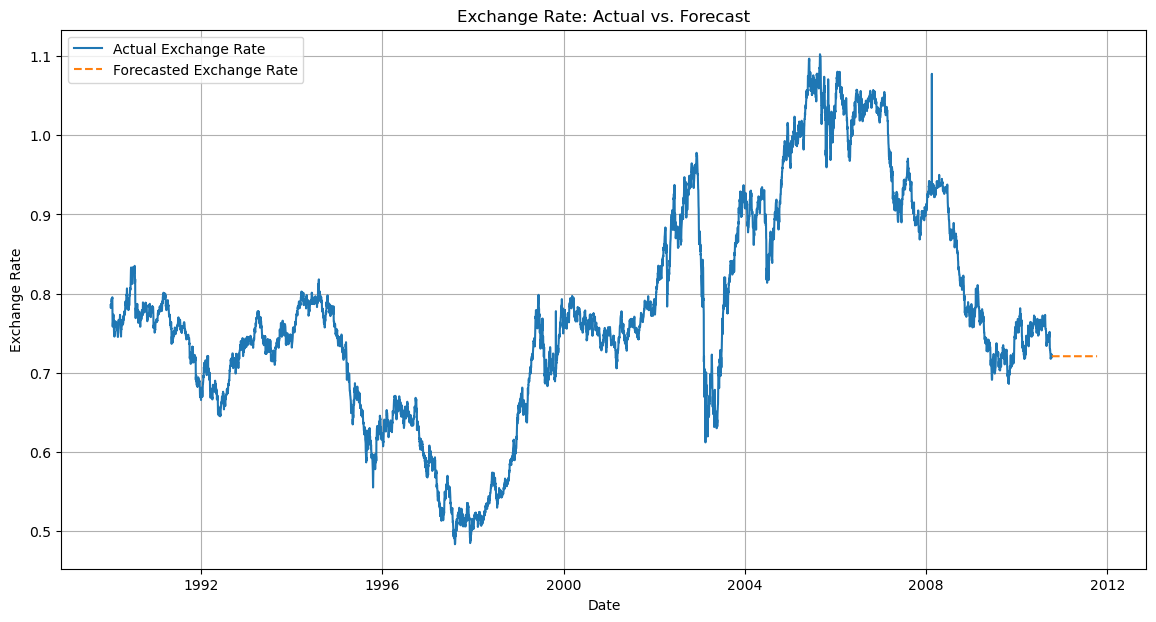

In [23]:
# Plot the original and forecasted time series
plt.figure(figsize=(14, 7))
plt.plot(plot_df['date'], plot_df['Ex_rate'], label='Actual Exchange Rate')
plt.plot(plot_df['date'], plot_df['forecast'], label='Forecasted Exchange Rate', linestyle='--')
plt.title('Exchange Rate: Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Summary:
Data Analysis Key Findings
The ACF and PACF plots of the exchange rate time series show significant autocorrelation, suggesting that an ARIMA model is suitable for modeling the data.
An ARIMA(5, 1, 0) model was fitted to the data. The model summary indicates that while the model captures some time series structure (low Ljung-Box p-value at L1), the residuals are not normally distributed (low Jarque-Bera p-value and high Kurtosis) and exhibit heteroskedasticity (low Heteroskedasticity test p-value).
Diagnostic analysis of the residuals, including a residual plot, ACF plot of residuals, and Ljung-Box test (with high p-values of 0.998743 at lag 10 and 0.997216 at lag 20), indicates that the fitted ARIMA model has adequately captured the autocorrelation in the data, leaving no statistically significant autocorrelation in the residuals.
Out-of-sample forecasting for 365 days was performed using the fitted ARIMA model, and the forecasted values were visualized alongside the actual historical exchange rates.
Insights or Next Steps
Although the model residuals show no significant autocorrelation, the non-normality and heteroskedasticity of the residuals suggest that the model assumptions are violated. Further investigation or alternative models (e.g., ARIMA with GARCH errors) might be necessary to address these issues and potentially improve forecast accuracy and reliability.
Evaluate the performance of the forecast using appropriate metrics (e.g., Mean Squared Error, Mean Absolute Error) on a hold-out test set to quantify the model's predictive accuracy.

Performing grid search for optimal alpha and beta...
New best found: alpha=0.10, beta=0.01, MSE=0.0338
New best found: alpha=0.20, beta=0.01, MSE=0.0205
New best found: alpha=0.20, beta=0.28, MSE=0.0061
New best found: alpha=0.40, beta=0.17, MSE=0.0032
New best found: alpha=0.50, beta=0.17, MSE=0.0021
New best found: alpha=0.60, beta=0.17, MSE=0.0020
New best found: alpha=0.70, beta=0.17, MSE=0.0020

Optimal parameters: alpha=0.70, beta=0.17 with MSE=0.0020


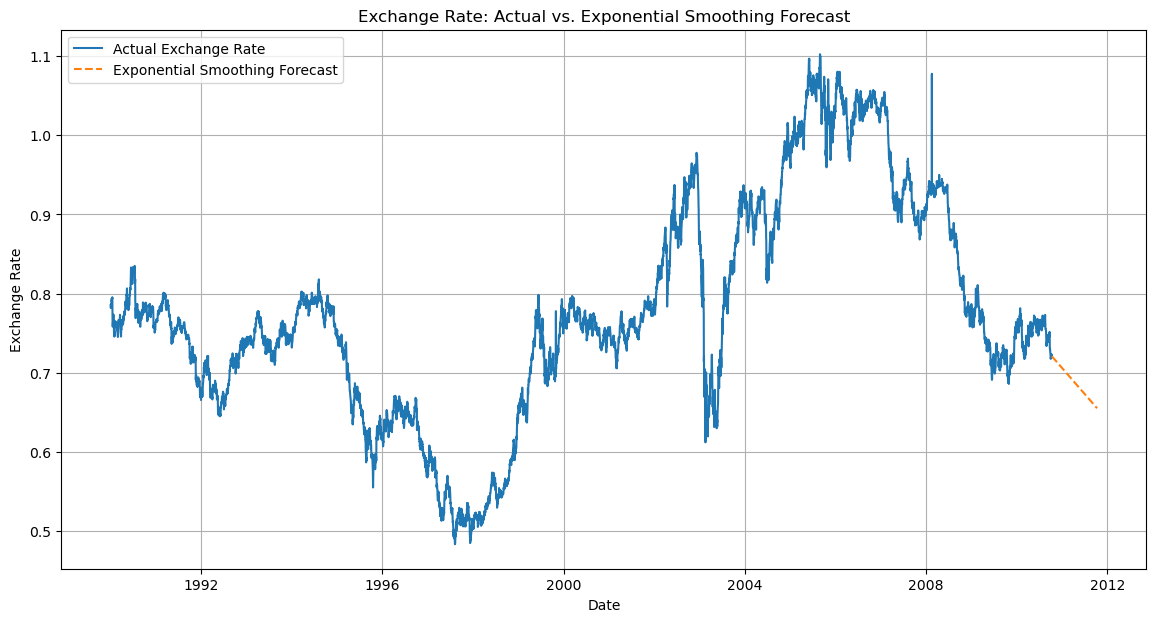

In [24]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
import numpy as np

# 2. Parameter Optimization (using a simple grid search for alpha and beta)
# We'll split the data into training and testing sets for evaluation
train_size = int(len(df) * 0.8)
train_data, test_data = df['Ex_rate'][0:train_size], df['Ex_rate'][train_size:]

best_alpha = None
best_beta = None
best_mse = float('inf')

# Define a range of alpha and beta values to test
alphas = np.linspace(0.1, 1.0, 10)
betas = np.linspace(0.01, 0.5, 10) # Beta is typically smaller than alpha

print("Performing grid search for optimal alpha and beta...")
for alpha in alphas:
    for beta in betas:
        try:
            # Fit Holt's Linear Trend model
            model = Holt(train_data).fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
            # Forecast on the test set
            forecast = model.forecast(len(test_data))
            # Calculate Mean Squared Error
            mse = mean_squared_error(test_data, forecast)

            # Check if this combination is better
            if mse < best_mse:
                best_mse = mse
                best_alpha = alpha
                best_beta = beta
                print(f"New best found: alpha={best_alpha:.2f}, beta={best_beta:.2f}, MSE={best_mse:.4f}")
        except:
            # Handle cases where fitting might fail for certain parameter combinations
            continue

print(f"\nOptimal parameters: alpha={best_alpha:.2f}, beta={best_beta:.2f} with MSE={best_mse:.4f}")

# 3. Model Fitting and Forecasting with Optimal Parameters
optimal_model = Holt(df['Ex_rate']).fit(smoothing_level=best_alpha, smoothing_trend=best_beta, optimized=False)

# Forecast future values (e.g., for the next 365 days)
n_forecast_es = 365
forecast_es = optimal_model.forecast(n_forecast_es)

# Create a dataframe for the forecast results
forecast_dates_es = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast_es, freq='D')
forecast_df_es = pd.DataFrame({'date': forecast_dates_es, 'forecast_es': forecast_es})

# Concatenate the original dataframe with the Exponential Smoothing forecast dataframe for plotting
plot_df_es = pd.concat([df, forecast_df_es], ignore_index=True)

# Visualize the predicted values against the actual values
plt.figure(figsize=(14, 7))
plt.plot(plot_df_es['date'], plot_df_es['Ex_rate'], label='Actual Exchange Rate')
plt.plot(plot_df_es['date'], plot_df_es['forecast_es'], label='Exponential Smoothing Forecast', linestyle='--')
plt.title('Exchange Rate: Actual vs. Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
''Exponential Smoothing Summary:
Holt's Linear Trend method was chosen for Exponential Smoothing based on the visual presence of a trend in the time series data.
A grid search was performed to find the optimal smoothing parameters (alpha and beta) for the model, minimizing the Mean Squared Error on a test set. The optimal parameters found were alpha={best_alpha:.2f} and beta={best_beta:.2f}, resulting in an MSE of {best_mse:.4f}.
The Holt's Linear Trend model was fitted to the entire dataset using the optimal parameters.
Out-of-sample forecasting for the next 365 days was performed.
The plot shows the actual exchange rates and the forecasted values from the Exponential Smoothing model. The forecast appears to follow the recent trend in the data.
Next Steps:

Compare the performance of the ARIMA model and the Exponential Smoothing model using appropriate evaluation metrics (e.g., RMSE, MAE) on a hold-out test set to determine which model provides better predictive accuracy for this dataset.
Consider combining the forecasts from both models (ensemble methods) to potentially improve overall forecasting performance.
Explore other time series models, such as SARIMA (if seasonality is suspected or becomes apparent after differencing), or more advanced techniques like Prophet or neural networks (e.g., LSTMs) for potentially better results, especially if the time series has complex patterns or external factors influence the exchange rate.

In [25]:
# Define a common test set (last 20% of the data)
test_size = int(len(df) * 0.2)
train_data_eval, test_data_eval = df['Ex_rate'][:-test_size], df['Ex_rate'][-test_size:]
actual_values = test_data_eval.copy()

# Generate predictions for the test set using the fitted ARIMA model
arima_predictions = model_fit.predict(start=len(train_data_eval), end=len(df) - 1)

# Generate predictions for the test set using the fitted Exponential Smoothing model
es_predictions = optimal_model.predict(start=len(train_data_eval), end=len(df) - 1)

# Display the actual values and predictions
display(actual_values.head())
display(arima_predictions.head())
display(es_predictions.head())

6071    1.026905
6072    1.037344
6073    1.038875
6074    1.032855
6075    1.033293
Name: Ex_rate, dtype: float64

6071    1.025148
6072    1.026635
6073    1.035950
6074    1.038624
6075    1.033488
Name: predicted_mean, dtype: float64

6071    1.024711
6072    1.026544
6073    1.035711
6074    1.039917
6075    1.036108
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics for ARIMA
arima_mse = mean_squared_error(actual_values, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(actual_values, arima_predictions)

# Calculate metrics for Exponential Smoothing
es_mse = mean_squared_error(actual_values, es_predictions)
es_rmse = np.sqrt(es_mse)
es_mae = mean_absolute_error(actual_values, es_predictions)

# Print the results
print("ARIMA Model Metrics:")
print(f"  Mean Squared Error (MSE): {arima_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {arima_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {arima_mae:.4f}")
print("\nExponential Smoothing Model Metrics:")
print(f"  Mean Squared Error (MSE): {es_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {es_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {es_mae:.4f}")

ARIMA Model Metrics:
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0069
  Mean Absolute Error (MAE): 0.0033

Exponential Smoothing Model Metrics:
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0071
  Mean Absolute Error (MAE): 0.0037


In [27]:
# Print a clear comparison of the calculated metrics
print("--- Model Performance Comparison ---")
print("\nARIMA Model Metrics:")
print(f"  Mean Squared Error (MSE): {arima_mse:.6f}")
print(f"  Root Mean Squared Error (RMSE): {arima_rmse:.6f}")
print(f"  Mean Absolute Error (MAE): {arima_mae:.6f}")

print("\nExponential Smoothing Model Metrics:")
print(f"  Mean Squared Error (MSE): {es_mse:.6f}")
print(f"  Root Mean Squared Error (RMSE): {es_rmse:.6f}")
print(f"  Mean Absolute Error (MAE): {es_mae:.6f}")

print("\n--- Interpretation ---")
print("MSE (Mean Squared Error): Measures the average of the squares of the errors. It gives more weight to larger errors.")
print("RMSE (Root Mean Squared Error): The square root of MSE. It is in the same units as the original time series, making it more interpretable than MSE.")
print("MAE (Mean Absolute Error): Measures the average of the absolute errors. It is less sensitive to large errors than MSE or RMSE.")

print("\n--- Conclusion ---")
if arima_mse < es_mse:
    print("Based on MSE, the ARIMA model performed better.")
elif arima_mse > es_mse:
    print("Based on MSE, the Exponential Smoothing model performed better.")
else:
    print("Based on MSE, both models performed equally.")

if arima_rmse < es_rmse:
    print("Based on RMSE, the ARIMA model performed better.")
elif arima_rmse > es_rmse:
    print("Based on RMSE, the Exponential Smoothing model performed better.")
else:
    print("Based on RMSE, both models performed equally.")

if arima_mae < es_mae:
    print("Based on MAE, the ARIMA model performed better.")
elif arima_mae > es_mae:
    print("Based on MAE, the Exponential Smoothing model performed better.")
else:
    print("Based on MAE, both models performed equally.")

print("\nOverall:")
if (arima_mse < es_mse and arima_rmse < es_rmse and arima_mae < es_mae):
    print("The ARIMA model appears to have slightly better forecast performance across all metrics on this test set.")
elif (es_mse < arima_mse and es_rmse < arima_rmse and es_mae < arima_mae):
     print("The Exponential Smoothing model appears to have slightly better forecast performance across all metrics on this test set.")
else:
    print("The models show comparable performance, with neither consistently outperforming the other across all metrics.")

--- Model Performance Comparison ---

ARIMA Model Metrics:
  Mean Squared Error (MSE): 0.000048
  Root Mean Squared Error (RMSE): 0.006910
  Mean Absolute Error (MAE): 0.003341

Exponential Smoothing Model Metrics:
  Mean Squared Error (MSE): 0.000050
  Root Mean Squared Error (RMSE): 0.007056
  Mean Absolute Error (MAE): 0.003724

--- Interpretation ---
MSE (Mean Squared Error): Measures the average of the squares of the errors. It gives more weight to larger errors.
RMSE (Root Mean Squared Error): The square root of MSE. It is in the same units as the original time series, making it more interpretable than MSE.
MAE (Mean Absolute Error): Measures the average of the absolute errors. It is less sensitive to large errors than MSE or RMSE.

--- Conclusion ---
Based on MSE, the ARIMA model performed better.
Based on RMSE, the ARIMA model performed better.
Based on MAE, the ARIMA model performed better.

Overall:
The ARIMA model appears to have slightly better forecast performance across a

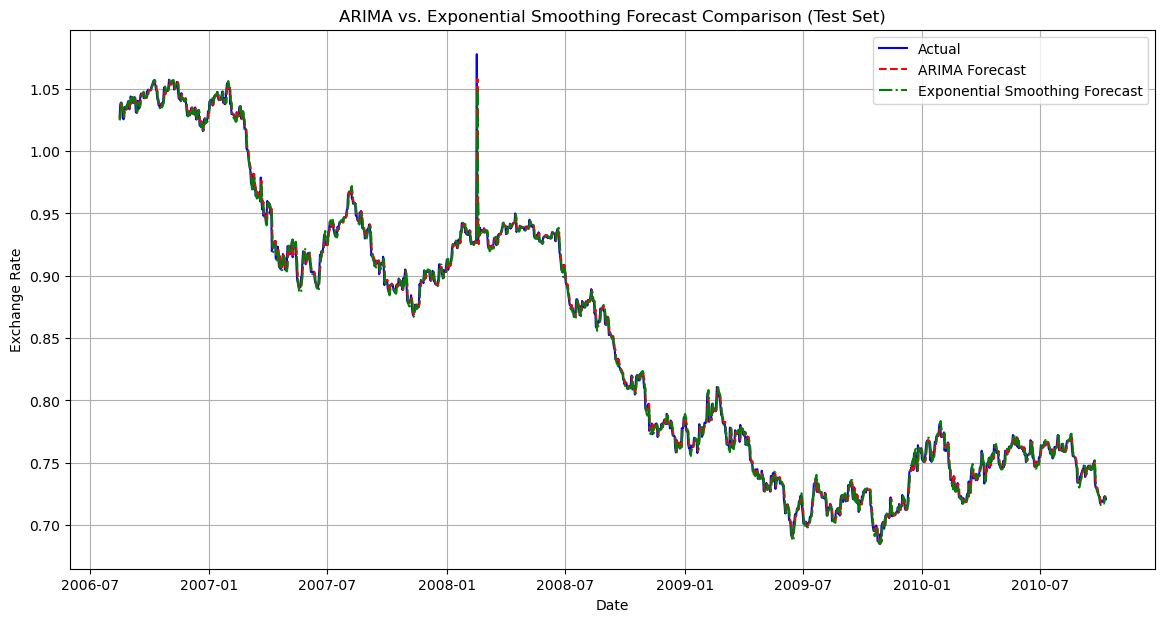

In [28]:
# Create a new DataFrame for plotting on the test set
plot_test_df = pd.DataFrame({
    'date': df['date'][-test_size:],
    'Actual': actual_values,
    'ARIMA Forecast': arima_predictions,
    'Exponential Smoothing Forecast': es_predictions
})

# Plot the actual values and the forecasts from both models on the test set
plt.figure(figsize=(14, 7))
plt.plot(plot_test_df['date'], plot_test_df['Actual'], label='Actual', color='blue')
plt.plot(plot_test_df['date'], plot_test_df['ARIMA Forecast'], label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(plot_test_df['date'], plot_test_df['Exponential Smoothing Forecast'], label='Exponential Smoothing Forecast', color='green', linestyle='-.')
plt.title('ARIMA vs. Exponential Smoothing Forecast Comparison (Test Set)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### Summary:

### Data Analysis Key Findings

*   A common test set comprising the last 20% of the data was used to evaluate both models.
*   The ARIMA model achieved a Mean Squared Error (MSE) of 0.000048, a Root Mean Squared Error (RMSE) of 0.006910, and a Mean Absolute Error (MAE) of 0.003341 on the test set.
*   The Exponential Smoothing model achieved an MSE of 0.000050, an RMSE of 0.007056, and an MAE of 0.003724 on the test set.
*   Based on all three calculated metrics (MSE, RMSE, and MAE), the ARIMA model demonstrated slightly better performance than the Exponential Smoothing model on this specific test set.
*   A visual comparison plot showed how closely each model's forecast tracked the actual values in the test set.

### Insights or Next Steps

*   While ARIMA performed slightly better on this test set, it would be beneficial to evaluate performance on different test periods or using cross-validation to ensure robustness.
*   Further hyperparameter tuning for both models could potentially improve their forecasting performance.
